In [1]:
# https://covid.ourworldindata.org/data/full_data.csv

# PYTHON LIBRARIES
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from adjustText import adjust_text
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

# https://github.com/btjones-me/raman_spectroscopy
import raman_analysis_clean as rac

# CONSTANTS
markerSymbol = [
    "o", #circle
    "v", #triangle_down
    "^", #triangle_up
    "<", #triangle_left
    ">", #triangle_right
    "s", #square
    "p", #pentagon
    "P", #plus (filled)
    "*", #star
    "H", #hexagon2
    "X", #x (filled)
    "D", #diamond
    "d", #thin_diamond
    "1", #tri_down
    "2", #tri_up
    "3", #tri_left
    "4", #tri_right
    "+", #plus
    "x"  #x
];

markerColour = [
    '#b71c1c', #red darken-4
    '#1a237e', #indigo darken-4
    '#004d40', #teal darken-4
    '#f57f17', #yellow darken-4
    '#3e2723', #brown darken-4    
    '#4a148c', #purple darken-4
    '#01579b', #light-blue darken-4
    '#33691e', #light-green darken-4
    '#e65100', #orange darken-4
    '#263238', #blue-grey darken-4
    '#880e4f', #pink darken-4
    '#0d47a1', #blue darken-4
    '#1b5e20', #green darken-4
    '#ff6f00', #amber darken-4
    '#212121', #grey darken-4
    '#311b92', #deep-purple darken-4
    '#006064', #cyan darken-4
    '#827717', #lime darken-4
    '#bf360c',  #deep-orange darken-4
    
    '#004d40', #teal darken-4
    '#006064', #cyan darken-4
    '#01579b', #light-blue darken-4
    '#1a237e', #indigo darken-4
    '#1b5e20', #green darken-4
    '#212121', #grey darken-4
    '#311b92', #deep-purple darken-4
    '#33691e', #light-green darken-4
    '#3e2723', #brown darken-4    
    '#4a148c', #purple darken-4
    '#827717', #lime darken-4
    '#880e4f', #pink darken-4
    '#b71c1c', #red darken-4
    '#bf360c', #deep-orange darken-4
    '#e65100', #orange darken-4
    '#f57f17', #yellow darken-4
    '#ff6f00'  #amber darken-4
];

# df.loc[<ROWS RANGE> , <COLUMNS RANGE>] to get elements by index
# df_raw = pd.read_csv("https://covid.ourworldindata.org/data/full_data.csv", delimiter=",");

---
# ./Raman.csv
---

In [2]:
df_ram_raw = pd.read_csv("./Raman.csv", delimiter=",");
print("./Raman.csv"); display(df_ram_raw.head(2));

./Raman.csv


,#WaveA,#IntensityA,#WaveB,#IntensityB,#WaveB00,#IntensityB00,#WaveB01,#IntensityB01,#WaveB02,#IntensityB02,...,#WaveB30,#IntensityB30,#WaveB31,#IntensityB31,#WaveB32,#IntensityB32,#WaveB33,#IntensityB33,#WaveB34,#IntensityB34
0,1905.679688,52.941963,1905.679688,63.971539,1905.679688,66.177452,1905.679688,52.941963,1905.679688,97.060265,...,1905.679688,55.147877,1905.679688,52.941963,1905.679688,52.941963,1905.679688,240.444748,1905.679688,200.738281
1,1904.546875,41.912388,1904.546875,48.530132,1904.546875,52.941963,1904.546875,52.941963,1904.546875,79.412941,...,1904.546875,39.706470,1904.546875,46.324219,1904.546875,61.765621,1904.546875,253.680237,1904.546875,180.885040


*************PEAKSCIPY**************
From scipy: 
Peak_pos=  [   4   66  138  255  450  616  683  729  776  817  885  918 1018] 
Peaks=  4       1901.144531
66      1830.308594
138     1746.812500
255     1608.478516
450     1370.964844
616     1161.869141
683     1075.593750
729     1015.707031
776      953.960938
817      899.626953
885      808.535156
918      763.886719
1018     626.816406
Name: #WaveA, dtype: float64 
Intensities=  4        44.086422
66       60.842773
138      72.749512
255     606.295105
450     602.784302
616     177.829742
683      86.811050
729      70.740936
776      58.724537
817      52.613632
885      48.202656
918      62.625725
1018     57.812847
Name: #IntensityA, dtype: float64
************************************
[[1370.964844  602.784302]
 [1608.478516  606.295105]]
Fit Guess:  [1370.9648439999999, 602.7843019999999, 10, 1608.4785160000001, 606.295105, 10]
popt: [1351.42580674  543.65061553  120.96286904 1594.24505123  527.26361483
   41.48123858]


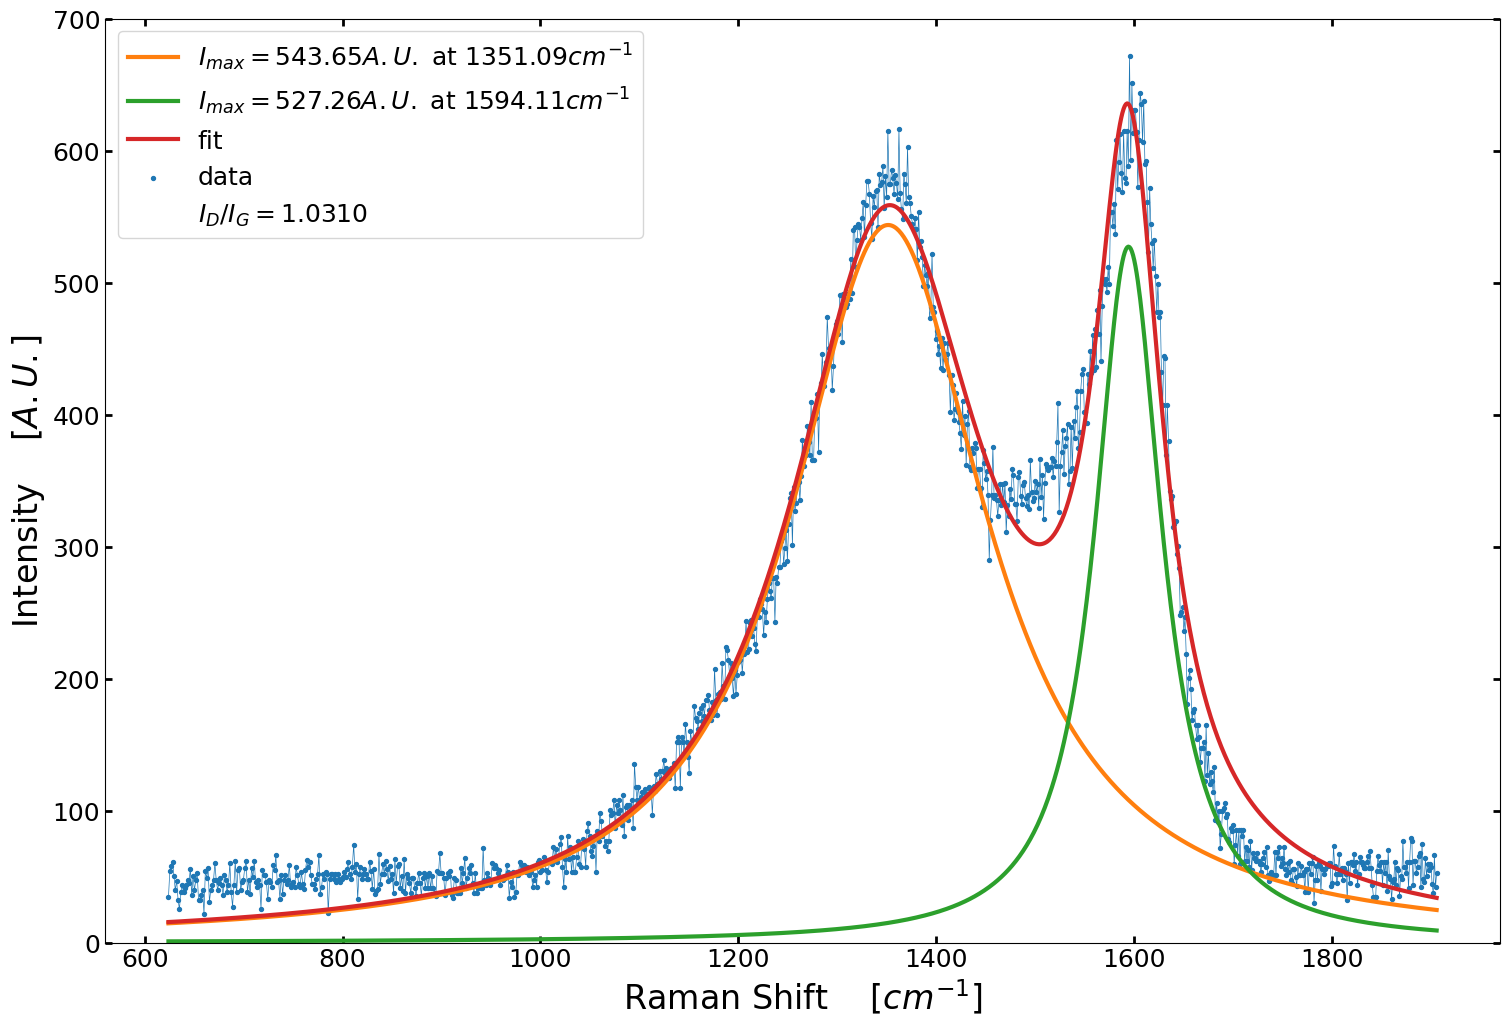

In [9]:
# Define x axis as the date axis
x_str = '#WaveA';      x_units = r'$[cm^{-1}]$';
y_str = '#IntensityA'; y_units = r'$[A.U.]$';

# Remove NANs from interesting x,y data
df_fil = pd.DataFrame(df_ram_raw);
df_fil = df_fil.dropna(subset=[x_str, y_str]);

# PLOT SETUP
scale = 6;
fig   = plt.figure(figsize=(3*scale, 2*scale));
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.tight_layout();

# Stablish the plot area
ax0 = plt.gca()

# Extract data from a specific country
x = df_fil.iloc[:][x_str];
y = df_fil.iloc[:][y_str];    
# Plot a curve to join the data points
#plt.plot(x, y) #, label="B")
plt.scatter(x, y, s=8, label='data')
plt.plot(x, y, linewidth=0.5)
        
# # avoid overlaps between annotations and add a linking line
# kwargs = dict(transform=ax0.transAxes);
# adjust_text(texts_ax0, ax=ax0, arrowprops=dict(arrowstyle="-", color='k', lw=0.1), **kwargs);

### ### ### ### ###
params, fit, ys, n_peaks = rac.predict_and_plot_lorentzians(x, y, 2) #2 = number of peaks to fit to ##Returns modified ys for y axis scaling
for j in range(0, len(params), 3): 
    ctr = params[j]
    amp = params[j+1]
    width = params[j+2]
    y = rac.lorentzian(x, amp, ctr, width)
    intensity = max(y)
    xAtIntensity = x[y[y == intensity].index[0]]
    area = rac.areaUnderLorentzian(min(x), max(x), amp, ctr, width)
    plt.plot(x, y, linestyle='-', linewidth=3,
             label=
             #'area=' + str(round(area, 2)) + '; ' +
             r'$I_{max}=$' + str(round(intensity, 2)) + r'$A.U.$' + ' at ' + str(round(xAtIntensity, 2)) + r'$cm^{-1}$')
plt.plot(x, fit, linestyle='-', linewidth=3, label='fit')
### ### ### ### ###

plt.scatter(x[0], fit[0], s=0, label=r'$I_D/I_G=1.0310$')
        
# Show the plot lengend to link colors and polymer names
handles, labels = ax0.get_legend_handles_labels();
lgd = dict(zip(labels, handles));

# fig.autofmt_xdate();
ax0.set_xlabel('Raman Shift' + '    ' + x_units, fontsize=24);
ax0.set_ylabel('Intensity' + '    ' + y_units, fontsize=24);

plt.ylim(0,700)

for tick in ax0.xaxis.get_major_ticks():
    tick.label.set_fontsize(18)
for tick in ax0.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

ax0.tick_params(which='both',
                direction='in',
                length=5,
                width=2,
                bottom=True,
                top=True,
                left=True,
                right=True)
    
# Display main plot
plt.legend(lgd.values(), lgd.keys(), prop={'size': 18}, loc="best");
plt.savefig('_Fig4a' + '.png', dpi=200, bbox_inches='tight');
plt.show();
mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

*************PEAKSCIPY**************
From scipy: 
Peak_pos=  [   4   89  260  476  598  629  724  758  893  928 1016] 
Peaks=  4       1901.144531
89      1803.775391
260     1602.498047
476     1338.640625
598     1184.859375
629     1145.216797
724     1022.242188
758      977.675781
893      797.738281
928      750.298828
1016     629.583984
Name: #WaveB, dtype: float64 
Intensities=  4        48.495064
89       56.212082
260     543.056152
476     597.879089
598     184.323380
629     175.438843
724      53.586082
758      49.427742
893      51.828644
928      29.413145
1016     39.761379
Name: #IntensityB, dtype: float64
************************************
[[1602.498047  543.056152]
 [1338.640625  597.879089]]
Fit Guess:  [1602.498047, 543.056152, 10, 1338.640625, 597.879089, 10]
popt: [1593.94082491  515.15708028   41.14988523 1349.57613736  529.03821709
  120.36672784]


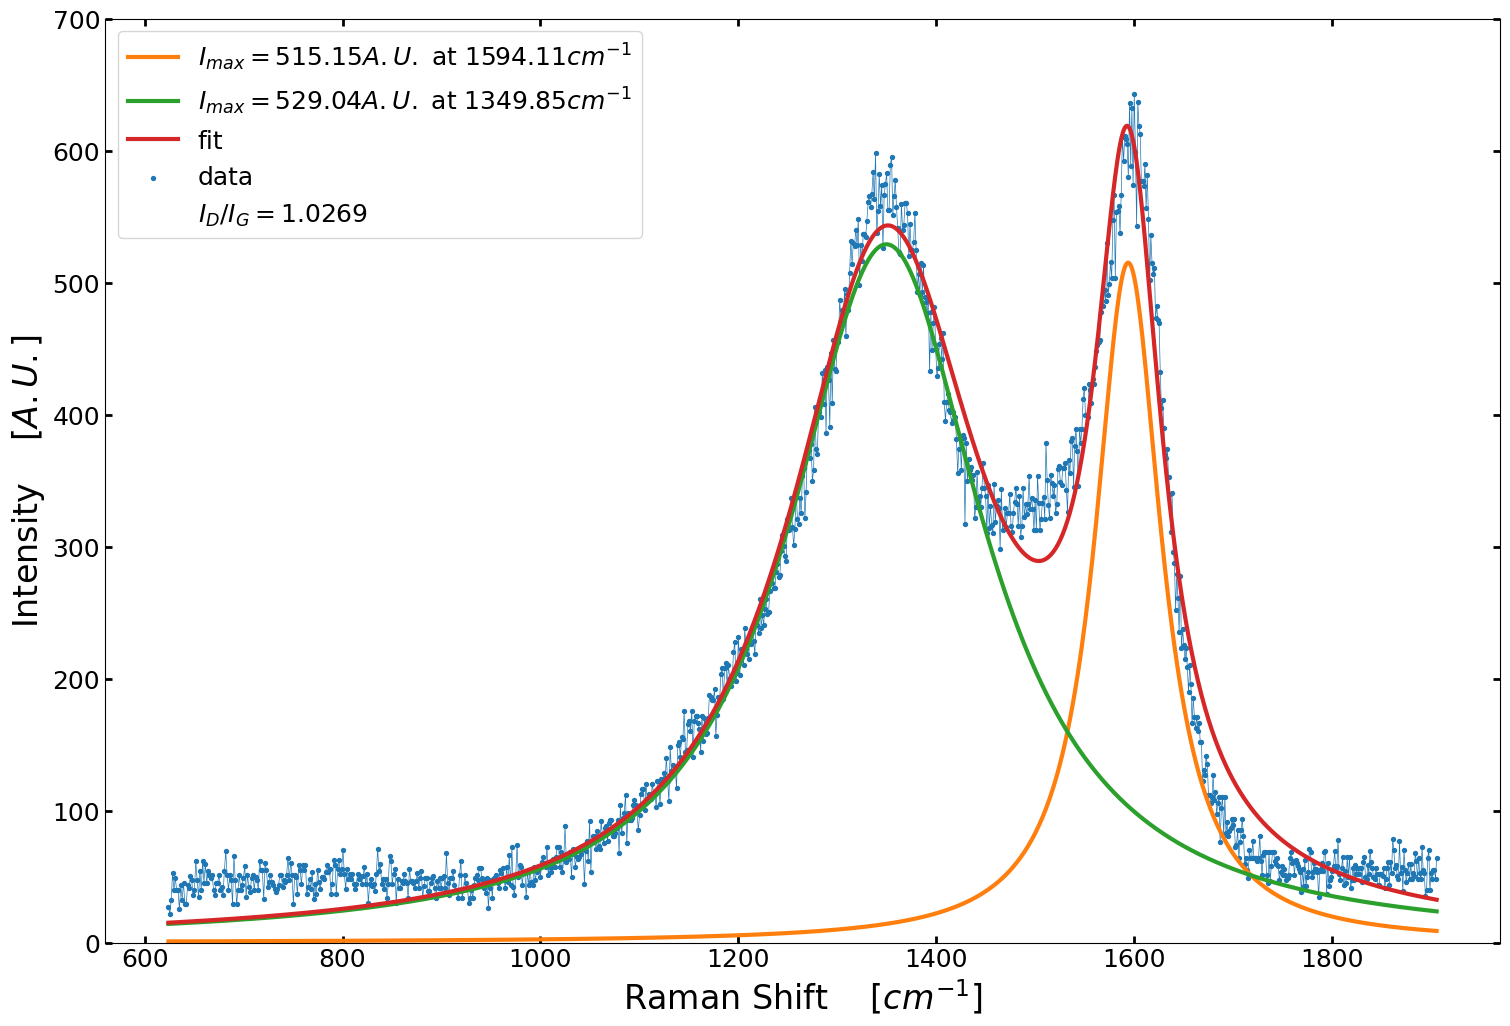

In [10]:
# Define x axis as the date axis
x_str = '#WaveB';      x_units = r'$[cm^{-1}]$';
y_str = '#IntensityB'; y_units = r'$[A.U.]$';

# Remove NANs from interesting x,y data
df_fil = pd.DataFrame(df_ram_raw);
df_fil = df_fil.dropna(subset=[x_str, y_str]);

# PLOT SETUP
scale = 6;
fig   = plt.figure(figsize=(3*scale, 2*scale));
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.tight_layout();

# Stablish the plot area
ax0 = plt.gca()

# Extract data from a specific country
x = df_fil.iloc[:][x_str];
y = df_fil.iloc[:][y_str];    
# Plot a curve to join the data points
#plt.plot(x, y) #, label="B")
plt.scatter(x, y, s=8, label='data')
plt.plot(x, y, linewidth=0.5)
        
# # avoid overlaps between annotations and add a linking line
# kwargs = dict(transform=ax0.transAxes);
# adjust_text(texts_ax0, ax=ax0, arrowprops=dict(arrowstyle="-", color='k', lw=0.1), **kwargs);

### ### ### ### ###
params, fit, ys, n_peaks = rac.predict_and_plot_lorentzians(x, y, 2) #2 = number of peaks to fit to ##Returns modified ys for y axis scaling
for j in range(0, len(params), 3): 
    ctr = params[j]
    amp = params[j+1]
    width = params[j+2]
    y = rac.lorentzian(x, amp, ctr, width)
    intensity = max(y)
    xAtIntensity = x[y[y == intensity].index[0]]
    area = rac.areaUnderLorentzian(min(x), max(x), amp, ctr, width)
    plt.plot(x, y, linestyle='-', linewidth=3,
             label=
             #'area=' + str(round(area, 2)) + '; ' +
             r'$I_{max}=$' + str(round(intensity, 2)) + r'$A.U.$' + ' at ' + str(round(xAtIntensity, 2)) + r'$cm^{-1}$')
plt.plot(x, fit, linestyle='-', linewidth=3, label='fit')
### ### ### ### ###

plt.scatter(x[0], fit[0], s=0, label=r'$I_D/I_G=1.0269$')

# Show the plot lengend to link colors and polymer names
handles, labels = ax0.get_legend_handles_labels();
lgd = dict(zip(labels, handles));

# fig.autofmt_xdate();
ax0.set_xlabel('Raman Shift' + '    ' + x_units, fontsize=24);
ax0.set_ylabel('Intensity' + '    ' + y_units, fontsize=24);

plt.ylim(0,700)

for tick in ax0.xaxis.get_major_ticks():
    tick.label.set_fontsize(18)
for tick in ax0.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

ax0.tick_params(which='both',
                direction='in',
                length=5,
                width=2,
                bottom=True,
                top=True,
                left=True,
                right=True)
    
# Display main plot
plt.legend(lgd.values(), lgd.keys(), prop={'size': 18}, loc="best");
plt.savefig('_Fig4b' + '.png', dpi=200, bbox_inches='tight');
plt.show();
mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

---
# ./Resistivity.csv
---

In [5]:
df_res_raw = pd.read_csv("./Resistivity.csv", delimiter=",");
print("./Resistivity.csv"); display(df_res_raw.head(10));

./Resistivity.csv


,ControlSample,CompressedSample
0,0.020023,0.018981
1,0.019026,0.018505
2,0.017169,0.017961


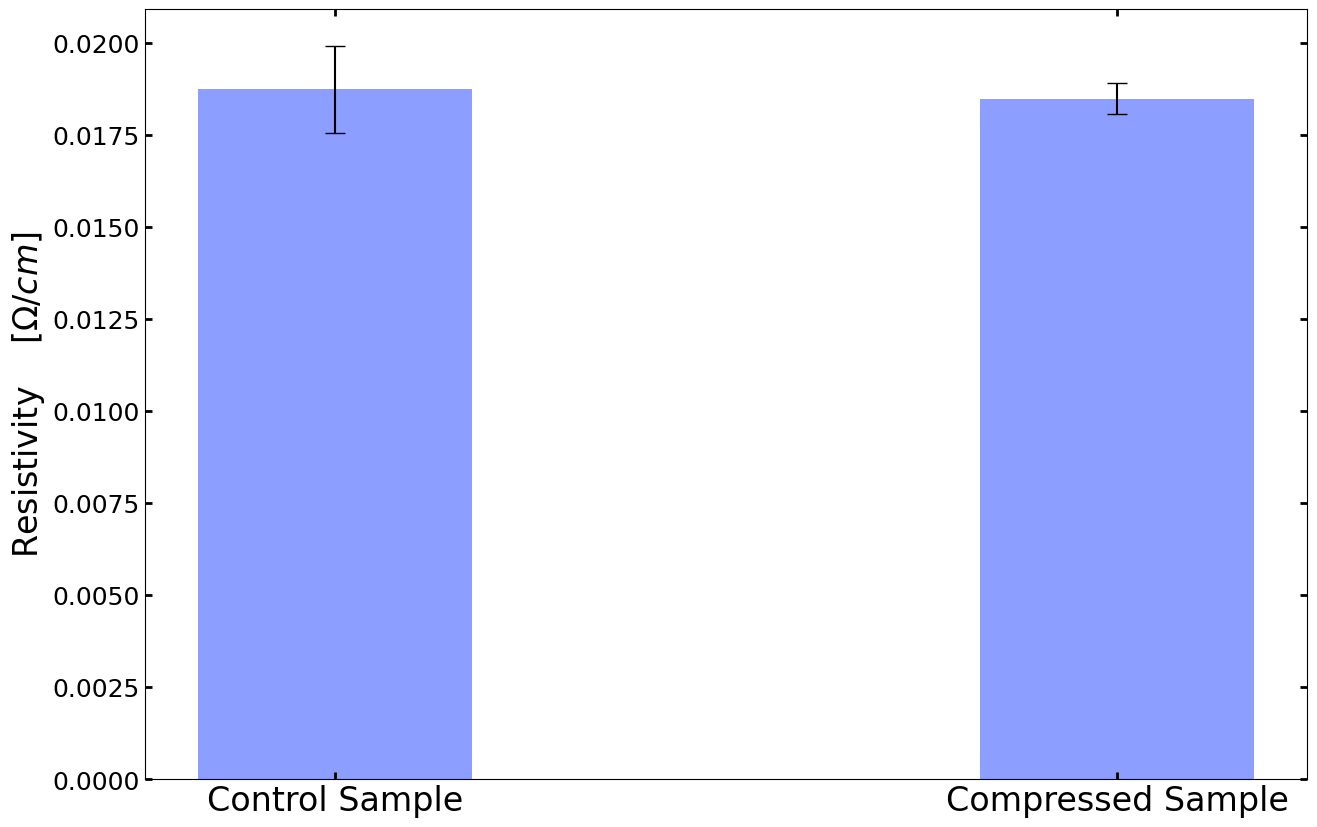

In [6]:
# Define x axis as the date axis
grp0_str = 'ControlSample';   x_units = '';
grp1_str = 'CompressedSample'; y_units = r'$[\Omega/cm]$';

# Remove NANs from interesting x,y data
df_fil = pd.DataFrame(df_res_raw);
df_fil = df_fil.dropna(subset=[grp0_str, grp1_str]);

# PLOT SETUP
scale = 5;
fig   = plt.figure(figsize=(3*scale, 2*scale));
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.tight_layout();

# Stablish the plot area
ax0 = plt.gca()

bars = [np.mean(df_fil.iloc[:][grp0_str]), np.mean(df_fil.iloc[:][grp1_str])];
err  = [np.std(df_fil.iloc[:][grp0_str]), np.std(df_fil.iloc[:][grp1_str])];

#r1 = np.arange(len(bars))
r1 = (range(len(bars)))
new_r1 = [1*i for i in r1]

plt.bar(new_r1, bars, color='#8c9eff', width=0.35, yerr=err, capsize=7)
        
# Show the plot lengend to link colors and polymer names
handles, labels = ax0.get_legend_handles_labels();
lgd = dict(zip(labels, handles));

# fig.autofmt_xdate();
ax0.set_xlabel('', fontsize=24);
ax0.set_ylabel('Resistivity' + '    ' + y_units, fontsize=24);

# Change x-axis labels with protein names
plt.xticks(new_r1,
           ['Control Sample','Compressed Sample'])

for tick in ax0.xaxis.get_major_ticks():
    tick.label.set_fontsize(24)
for tick in ax0.yaxis.get_major_ticks():
    tick.label.set_fontsize(18) 

ax0.tick_params(which='both',
                direction='in',
                length=5,
                width=2,
                bottom=True,
                top=True,
                left=True,
                right=True)
    
# Display main plot
# plt.legend(lgd.values(), lgd.keys(), prop={'size': 15}, loc="upper left");
plt.savefig('_Fig3' + '.png', dpi=200, bbox_inches='tight');
plt.show();
mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

##### ---
# ./XRD.csv
---

In [7]:
df_xrd_raw = pd.read_csv("./XRD.csv", delimiter=",");
print("./XRD.csv");         display(df_xrd_raw.head(2));

./XRD.csv


,IntensityB,DegreesB,IntensityA,DegreesA,DegreesAp1000
0,5.00,950,5.00,1046,2046
1,5.05,936,5.05,1032,2032


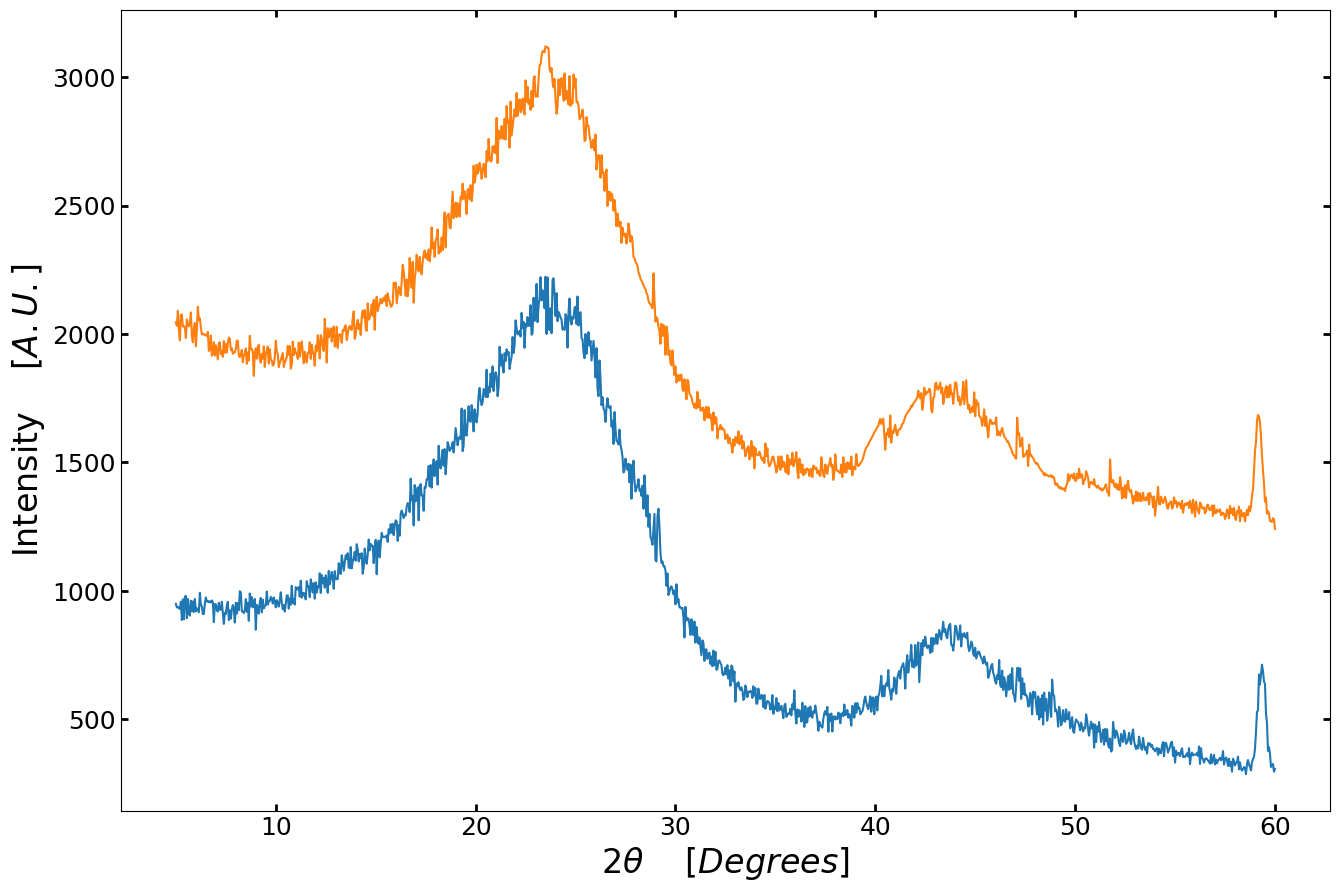

In [8]:
# PLOT SETUP
scale = 5.2;
fig   = plt.figure(figsize=(3*scale, 2*scale));
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.tight_layout();

# Stablish the plot area
df_fil = pd.DataFrame(df_xrd_raw);
ax0 = plt.gca()

# Define x axis as the date axis
x_str = 'DegreesB';   x_units = r'$[Degrees]$';
y_str = 'IntensityB'; y_units = r'$[A.U.]$';
# Remove NANs from interesting x,y data
df_fil = df_fil.dropna(subset=[x_str, y_str]);
# Extract data from a specific country
x      = df_fil.iloc[:][x_str];
y      = df_fil.iloc[:][y_str];    
# Plot a curve to join the data points
plt.plot(y, x) #, label="B")

# Define x axis as the date axis
x_str = 'DegreesAp1000';
y_str = 'IntensityA';
# Remove NANs from interesting x,y data
df_fil = df_fil.dropna(subset=[x_str, y_str]);
# Extract data from a specific country
x      = df_fil.iloc[:][x_str];
y      = df_fil.iloc[:][y_str];    
# Plot a curve to join the data points
plt.plot(y, x) #, label="B")
        
# # avoid overlaps between annotations and add a linking line
# kwargs = dict(transform=ax0.transAxes);
# adjust_text(texts_ax0, ax=ax0, arrowprops=dict(arrowstyle="-", color='k', lw=0.1), **kwargs);
        
# Show the plot lengend to link colors and polymer names
handles, labels = ax0.get_legend_handles_labels();
lgd = dict(zip(labels, handles));

# fig.autofmt_xdate();
ax0.set_xlabel(r'$2\theta$' + '    ' + x_units, fontsize=24);
ax0.set_ylabel('Intensity' + '    ' + y_units, fontsize=24);

for tick in ax0.xaxis.get_major_ticks():
    tick.label.set_fontsize(18)
for tick in ax0.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)
    
ax0.tick_params(which='both',
                direction='in',
                length=5,
                width=2,
                bottom=True,
                top=True,
                left=True,
                right=True)

# Display main plot
# plt.legend(lgd.values(), lgd.keys(), prop={'size': 15}, loc="upper left");
plt.savefig('_Fig5' + '.png', dpi=200, bbox_inches='tight');
plt.show();
mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

$\mu m$